In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels
import numpy as np

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [4]:
df = pd.read_csv("full_data.csv", encoding="latin")
df

,Unnamed: 0,ward,borough,%_english_is_first_language_of_no_one_in_household_2011,median_house_price_2014,median_household_income_estimate_2012_13,male_life_expectancy_2009_13,female_life_expectancy_2009_13,%_area_that_is_open_space_2014,%_travel_by_bicycle_to_work_2011,turnout_at_mayoral_election_2012,crime_rate_2014_15,%_bame_2011,%_all_older_people_aged_65_2015,%_homes_with_good_access_to_nature,%_homes_with_deficiency_in_access_to_nature,female_life_expectancy_normalised,male_life_expectancy_normalised
0,1,E05000026,Barking and Dagenham,25.7,173000.0,33920.0,80.2,83.9,21.9,0.8,25.7,138.1,71.9,5.0,98.0,2.0,0.996498,1.005313
1,2,E05000027,Barking and Dagenham,7.9,215000.0,32470.0,77.2,80.6,20.6,1.0,20.3,73.6,29.9,10.0,28.0,72.0,0.957303,0.967708
2,3,E05000028,Barking and Dagenham,10.5,210000.0,33000.0,79.0,79.3,1.9,1.6,22.5,79.9,41.2,8.7,83.0,17.0,0.941863,0.990271
3,4,E05000029,Barking and Dagenham,6.5,240500.0,33920.0,79.2,82.2,56.0,1.2,25.3,76.1,37.9,14.2,36.0,64.0,0.976306,0.992778
4,5,E05000030,Barking and Dagenham,4.5,240000.0,37400.0,77.1,81.1,50.4,1.6,24.1,66.7,24.8,14.2,100.0,0.0,0.963242,0.966455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,620,E05000645,Westminster,15.1,715650.0,47340.0,83.3,84.3,32.4,5.9,40.2,57.7,21.8,14.9,0.0,100.0,1.001249,1.044172
620,621,E05000646,Westminster,17.0,840000.0,46550.0,80.0,85.1,26.4,4.3,37.8,82.4,29.3,12.6,59.0,41.0,1.010750,1.002806
621,622,E05000647,Westminster,15.9,857250.0,50250.0,80.7,88.5,4.0,5.9,36.8,138.1,24.0,12.1,69.0,31.0,1.051133,1.011581
622,623,E05000648,Westminster,24.1,499975.0,32390.0,75.1,81.6,19.2,5.1,29.6,75.5,52.8,9.0,87.0,13.0,0.969180,0.941384


**Summary statistics of median_household_income_estimate_2012_13**

In [5]:
size = len(df)

# middles
mean = df['median_household_income_estimate_2012_13'].mean() 
# mode = df['median_household_income_estimate_2012_13'].mode() not useful
median = df['median_household_income_estimate_2012_13'].median()

# spread
min_avg_income = df['median_household_income_estimate_2012_13'].min()
max_avg_income = df['median_household_income_estimate_2012_13'].max()
range_avg_income = max_avg_income - min_avg_income
variance = df['median_household_income_estimate_2012_13'].var()
std_dev = df['median_household_income_estimate_2012_13'].std()

print("size of data set: ", size)
print("mean: ", mean)
print("median: ", median)
print("min avg income: ", min_avg_income)
print("max avg income: ", max_avg_income)
print("range avg income: ", range_avg_income)
print("variance: ", variance)
print("standard deviation: ", std_dev)

size of data set:  624
mean:  39224.66346153846
median:  38165.0
min avg income:  25090.0
max avg income:  88330.0
range avg income:  63240.0
variance:  54701090.41625507
standard deviation:  7396.018551643518


<AxesSubplot:>

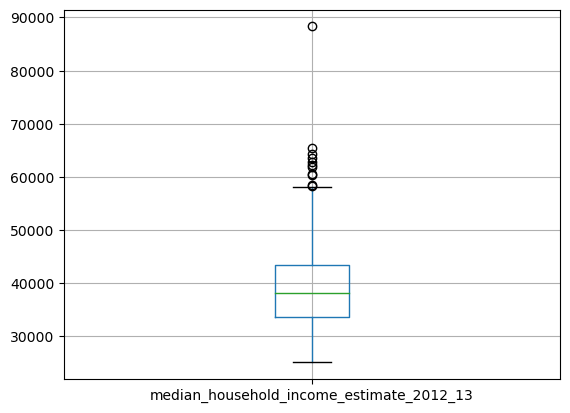

In [7]:
# boxplot
df.boxplot(column='median_household_income_estimate_2012_13')

Text(43147.12980769231, 109.62, 'Mean: 39224.66')

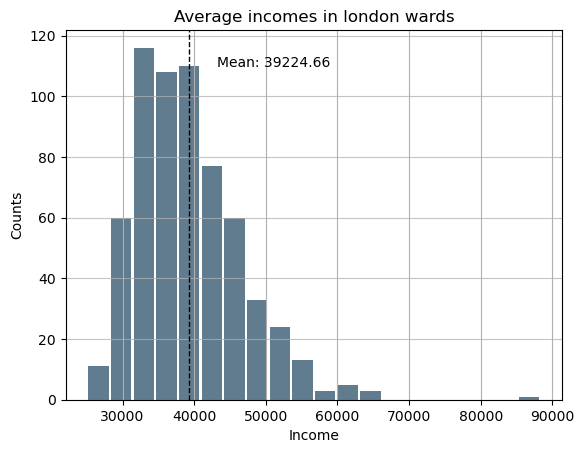

In [11]:
# histogram
df['median_household_income_estimate_2012_13'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Average incomes in london wards')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean))